## Heart Disease Prediction

In this project, the dataset have collected from Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci) and we will be using Machine Learning to make predictions on whether a person is suffering from Heart Disease or not.

## Problem Defenition

Our aim is to predict whether a person has a heart disease or not based on the various biological and physical parameters and develop a heart prediction system.

## Importing Libreres

In [1]:
# data analysis
import numpy as np
import pandas as pd
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

## Data loading

In [2]:
# reading my data 
data = pd.read_csv('heart.csv')


In [3]:
#Printing out a few columns
data.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


## Exploratory and Understanding The Data

* age: The person's age in years
* sex: The person's sex (1 = male, 0 = female)
* cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
* trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
* chol: The person's cholesterol measurement in mg/dl
* fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* thalach: The person's maximum heart rate achieved
* exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
* slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
* ca: The number of major vessels (0-3)
* thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
* target: Heart disease (0 = no, 1 = yes)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Checking for null values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
#Luckily, our data is clean and we have no missing values

## Exploratory Data Analysis (EDA)
 

In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Analysing the 'target' variable

In [8]:
data["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [9]:
data["target"].unique()

array([1, 0])

### Checking correlation between columns 

In [10]:
print(data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


<AxesSubplot:>

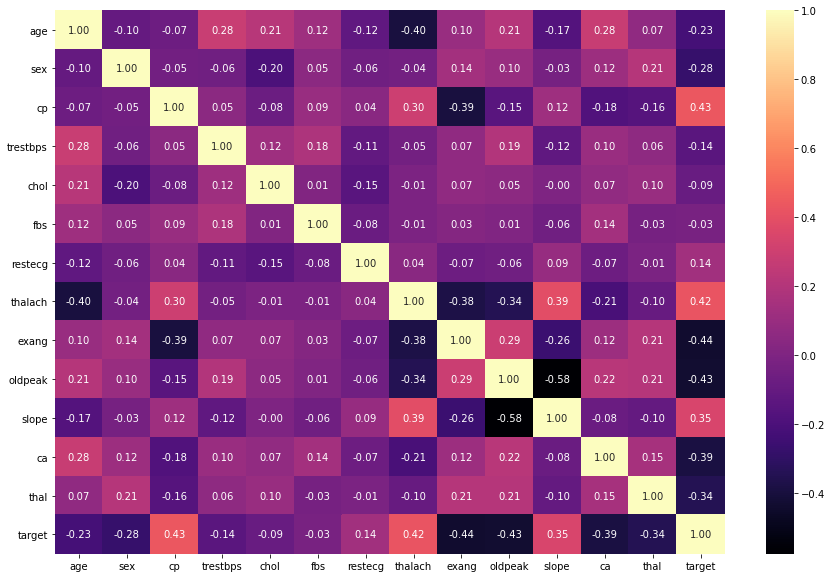

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap="magma",fmt='.2f')

Taking a look at the correlation matrix above, it's easy to see that a few features have negative correlation with the target value while some have positive. Now let see various visual representations of the data to understand more about relationship between various feautures.

### Data visualisation

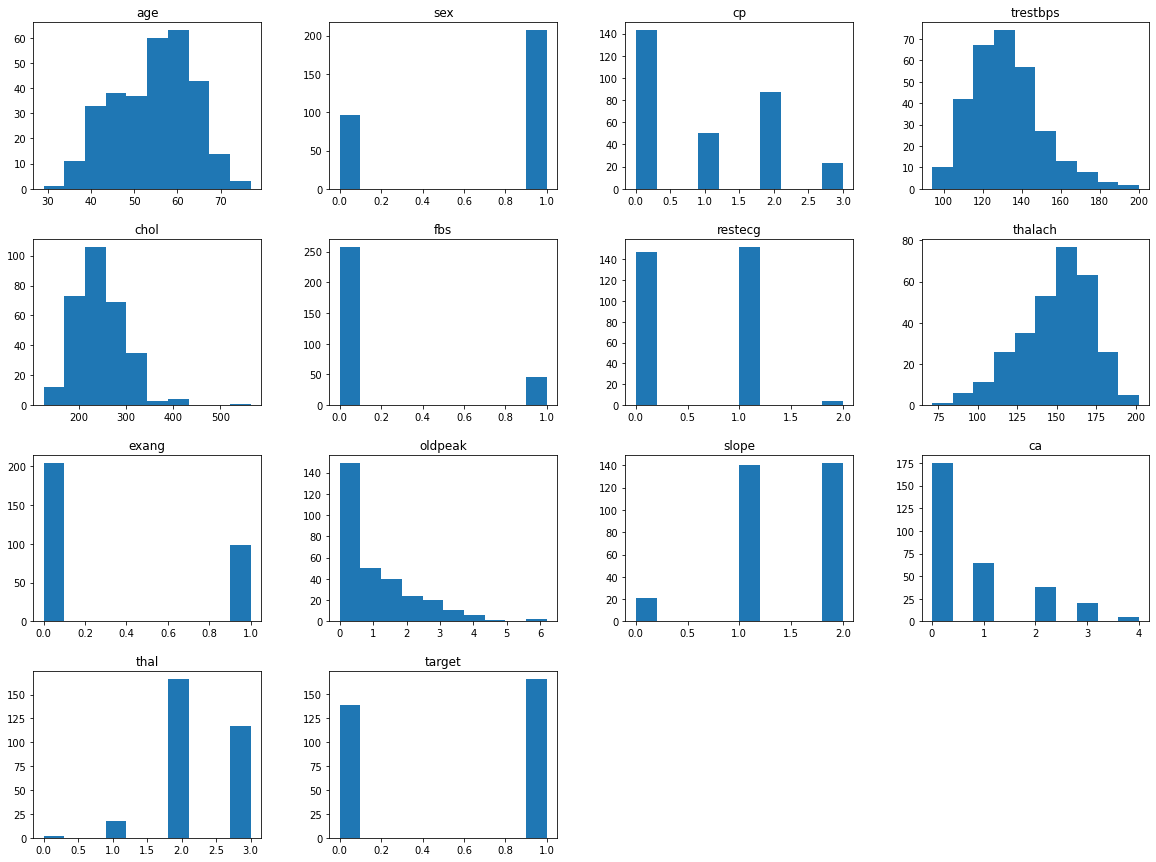

In [12]:
data.hist(linewidth=1.2, grid=False, figsize=(20, 15));

Taking a look at the histograms above, I can see that each feature has a different range of distribution.

* <b>Analysing 'target', 'sex', 'cp', 'restecg', 'exang', 'slope', 'ca' and 'thal' features</b>

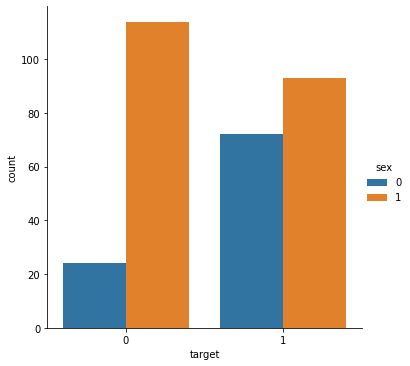

In [13]:
#Let's first, analysing the target variable
sns.catplot(x='target', data=data, hue='sex', kind='count')

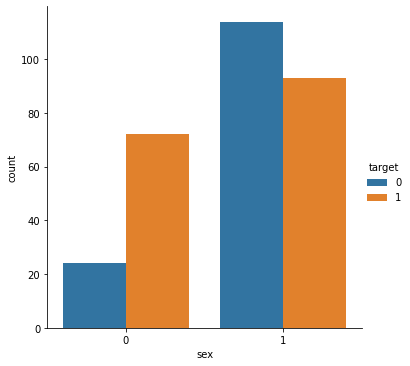

In [14]:
#Analysing the 'Sex' feature
sns.catplot(x='sex', data=data, kind='count', hue='target')

<b>According to this Cleveland dataset males are more susceptible to get Heart Disease than females. Men experience heart attacks more than women.</b>

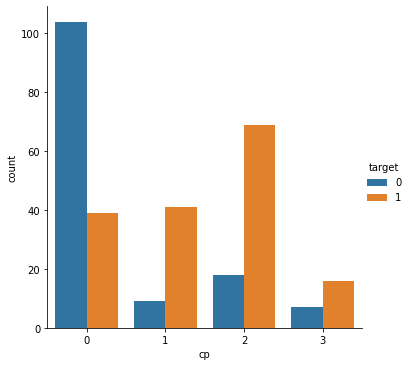

In [15]:
sns.catplot(x='cp', data=data, hue='target', kind='count')

<b>There are four types of chest pain, asymptomatic, atypical angina, non-anginal pain and typical angina. Most of the Heart Disease patients are found to have asymptomatic chest pain.</b>

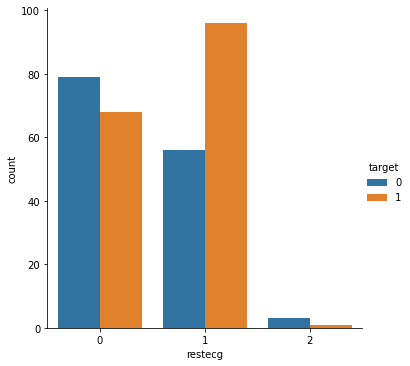

In [16]:
sns.catplot(x='restecg', data=data, hue='target', kind='count')

<b>We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'</b>

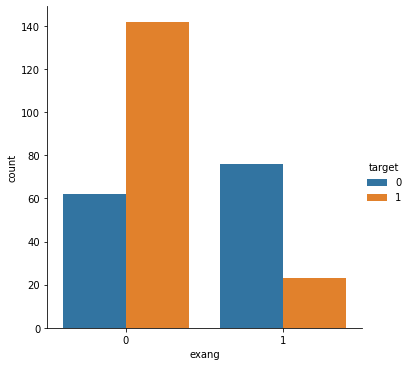

In [17]:
sns.catplot(x='exang', data=data, hue='target', kind='count')

<b>People with exang '0' are much more likely to have a heart disease than with exang '1'</b>

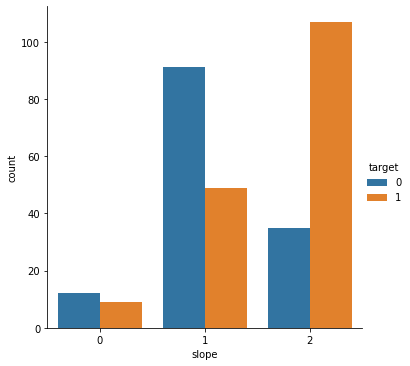

In [18]:
sns.catplot(x='slope', data=data, hue='target', kind='count')

<b>People with slope '0' are much less likely to have heart problems than with slope '1' and '2'</b/

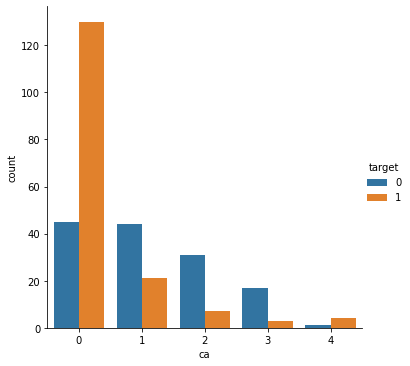

In [19]:
sns.catplot(x='ca', data=data, hue='target', kind='count')

<b>ca '0' has astonishingly large number of heart problems</b>

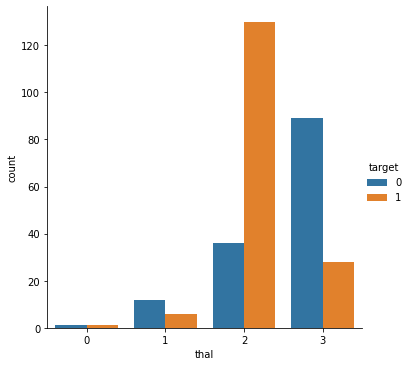

In [20]:
sns.catplot(x='thal', data=data, hue='target', kind='count')

<b>thal '2' has astonishingly large number of heart problems</b>